# Guide to Different Financial Asset Classes

## Learning Objectives
By the end of this notebook, you will understand:
- The characteristics of major trading asset classes
- Brokerage options for trading each asset type
- Key value drivers that affect asset prices (demonstrated with real data)
- Trading strategies and considerations for each asset class
- Historical context and evolution of these markets

## Table of Contents
1. [Introduction & Common Characteristics](#introduction)
2. [Stocks: Earnings Impact Analysis](#stocks)
3. [Bonds: Interest Rate Sensitivity](#bonds)
4. [ETFs: Diversification Benefits](#etfs)
5. [Commodities: Seasonal Effects](#commodities)
6. [US Dollar: Fed Policy Impact](#usd)
7. [Gold vs Dollar Strength](#gold)

## 1. Introduction & Common Characteristics

### What Are Trading Assets?
Trading assets are financial instruments that can be bought, sold, or exchanged in financial markets. Each asset class has unique characteristics, but they share common elements:

### Universal Trading Requirements
- **Brokerage Account**: A licensed intermediary to execute trades
- **Market Access**: Connection to exchanges or trading platforms
- **Capital**: Initial investment funds
- **Research & Analysis**: Tools for fundamental and technical analysis
- **Risk Management**: Stop-losses, position sizing, portfolio diversification

### Common Trading Concepts
- **Backtesting**: Testing trading strategies on historical data
- **Paper Trading**: Simulated trading without real money
- **Liquidity**: How easily an asset can be bought or sold
- **Volatility**: The degree of price fluctuation
- **Spread**: Difference between bid (buy) and ask (sell) prices
- **Market Hours**: When trading is available

In [2]:
# Import necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_palette("husl")

# print("📊 DATASET DESCRIPTIONS")
# print("=" * 80)
# print("\n🔹 STOCK DATA (stock_earnings_data.csv):")
# print("   • AAPL stock prices with earnings announcement windows marked")
# print("   • Columns: Open, High, Low, Close, Volume, Daily_Return, Earnings_Window")
# print("   • Purpose: Demonstrate how company earnings drive stock price volatility")
# print("   • Key insight: Volatility spikes around quarterly earnings releases")

# print("\n🔹 BOND DATA (bond_interest_rate_data.csv):")
# print("   • TLT (20+ Year Treasury Bond ETF) prices vs 10-Year Treasury yields")
# print("   • Columns: Bond_Price, Interest_Rate, Bond_Return, Rate_Change")
# print("   • Purpose: Show inverse relationship between bond prices and interest rates")
# print("   • Key insight: When rates rise, bond prices fall (duration risk)")

# print("\n🔹 COMMODITY DATA (commodity_seasonal_data.csv):")
# print("   • Crude Oil (CL=F) futures with seasonal month indicators")
# print("   • Columns: Open, High, Low, Close, Volume, Month, Daily_Return")
# print("   • Purpose: Reveal seasonal price patterns in commodity markets")
# print("   • Key insight: Oil shows predictable seasonal premiums (driving season)")

# print("\n🔹 FUTURES DATA (futures_leverage_data.csv):")
# print("   • S&P 500 futures (ES=F) vs ETF (SPY) comparison")
# print("   • Columns: Futures_Price, ETF_Price, Futures_Return, ETF_Return")
# print("   • Purpose: Demonstrate futures tracking and leverage characteristics")
# print("   • Key insight: Futures track underlying assets with amplified moves")

# print("\n🔹 FED POLICY DATA (fed_policy_data.csv):")
# print("   • US Dollar Index (DXY) with Federal Reserve meeting dates")
# print("   • Columns: Open, High, Low, Close, Volume, Daily_Return, Fed_Meeting")
# print("   • Purpose: Show how Fed policy announcements drive currency volatility")
# print("   • Key insight: Dollar volatility spikes on FOMC meeting days")

# print("\n🔹 GOLD DATA (gold_price_data.csv) - REAL MARKET DATA:")
# print("   • GLD ETF (SPDR Gold Shares) price data - real downloaded data")
# print("   • Columns: Open, High, Low, Close, Volume, Daily_Return")
# print("   • Purpose: Demonstrate REAL gold-dollar inverse relationship")
# print("   • Key insight: Strong negative correlation with USD (-0.51 correlation)")

print("\n" + "=" * 80)
print("Loading real market data...")

# Load all real market data
stock_data = pd.read_csv('stock_earnings_data.csv', index_col=0, parse_dates=True)
bond_data = pd.read_csv('bond_interest_rate_data.csv', index_col=0, parse_dates=True)
commodity_data = pd.read_csv('commodity_seasonal_data.csv', index_col=0, parse_dates=True)
futures_data = pd.read_csv('futures_leverage_data.csv', index_col=0, parse_dates=True)
fed_data = pd.read_csv('fed_policy_data.csv', index_col=0, parse_dates=True)

# Load gold data if available

gold_data = pd.read_csv('gold_price_data.csv', index_col=0, parse_dates=True)
print("✅ Data loaded successfully!")
print(f"📈 Stock data (AAPL): {len(stock_data)} observations from {stock_data.index[0].strftime('%Y-%m-%d')} to {stock_data.index[-1].strftime('%Y-%m-%d')}")
print(f"📊 Bond data (TLT/TNX): {len(bond_data)} observations from {bond_data.index[0].strftime('%Y-%m-%d')} to {bond_data.index[-1].strftime('%Y-%m-%d')}")
print(f"🛢️ Commodity data (Oil): {len(commodity_data)} observations from {commodity_data.index[0].strftime('%Y-%m-%d')} to {commodity_data.index[-1].strftime('%Y-%m-%d')}")
print(f"📋 Futures data (ES/SPY): {len(futures_data)} observations from {futures_data.index[0].strftime('%Y-%m-%d')} to {futures_data.index[-1].strftime('%Y-%m-%d')}")
print(f"💵 Fed policy data (DXY): {len(fed_data)} observations from {fed_data.index[0].strftime('%Y-%m-%d')} to {fed_data.index[-1].strftime('%Y-%m-%d')}")
print(f"🥇 Gold data (GLD): {len(gold_data)} observations from {gold_data.index[0].strftime('%Y-%m-%d')} to {gold_data.index[-1].strftime('%Y-%m-%d')}")
    

print("\n🎯 Ready to analyze how real market forces drive asset prices!")
print("🥇 Gold analysis will use REAL GLD ETF data to demonstrate inverse relationship with USD!")


Loading real market data...
✅ Data loaded successfully!
📈 Stock data (AAPL): 501 observations from 2023-09-25 to 2025-09-23
📊 Bond data (TLT/TNX): 501 observations from 2023-09-25 to 2025-09-23
🛢️ Commodity data (Oil): 1257 observations from 2020-09-25 to 2025-09-24
📋 Futures data (ES/SPY): 250 observations from 2024-09-24 to 2025-09-23
💵 Fed policy data (DXY): 754 observations from 2022-09-26 to 2025-09-24
🥇 Gold data (GLD): 750 observations from 2022-09-27 to 2025-09-23

🎯 Ready to analyze how real market forces drive asset prices!
🥇 Gold analysis will use REAL GLD ETF data to demonstrate inverse relationship with USD!


---

## 2. Stocks: Earnings Impact Analysis

### What Are Stocks?
Stocks are shares of ownership in publicly traded companies. When you buy a stock, you own a piece of that company and have a claim on its assets and earnings.

### Purpose of Stock Markets
- **For Companies**: Raise capital from public investors to fund growth, expansion, and operations
- **For Investors**: Own pieces of successful businesses and participate in their growth
- **For Economy**: Allocate capital efficiently to productive businesses

### Main Price Driving Forces
1. **Company Earnings** - Quarterly profit reports (biggest impact)
2. **Revenue Growth** - Sales trends and business expansion
3. **Market Sentiment** - Investor confidence and fear/greed cycles
4. **Economic Conditions** - Interest rates, inflation, GDP growth
5. **Industry Trends** - Sector-specific developments and competition

### Real Data Analysis: Earnings Drive Stock Prices
Let's examine how Apple's stock price reacts around earnings announcements using actual market data.

### How to Trade Stocks
**Brokers**: 
Major Domestic Brokers:
  - CITIC Securities (中信证券) - Largest securities firm in China
  - Haitong Securities (海通证券) - Major full-service broker
  - Guotai Junan Securities (国泰君安) - Leading securities company
  - China Securities (中金公司/CICC) - Premier investment bank and broker
  - Galaxy Securities (银河证券) - Large state-owned broker
  - Shenwan Hongyuan Securities (申万宏源) - Major securities firm
  - Ping An Securities (平安证券) - Part of Ping An Group

Local Hong Kong Brokers:
  - BOCI Securities (中银国际) - Bank of China subsidiary
  - CLSA - Premium institutional and retail services
  - Haitong International - Hong Kong arm of mainland Haitong

International Brokers:
  - Interactive Brokers - Global access including HKEX
  - Charles Schwab International - US-based with HK presence
  - Saxo Bank - Danish bank with Asian operations
  - IG Markets - UK-based broker
  - CMC Markets - Australian broker with HK office

Popular Fintech Brokers:
  - Futu Securities (富途证券) - Mobile-first platform
  - Tiger Brokers - Multi-market access
  - Webull - Commission-free trading platform


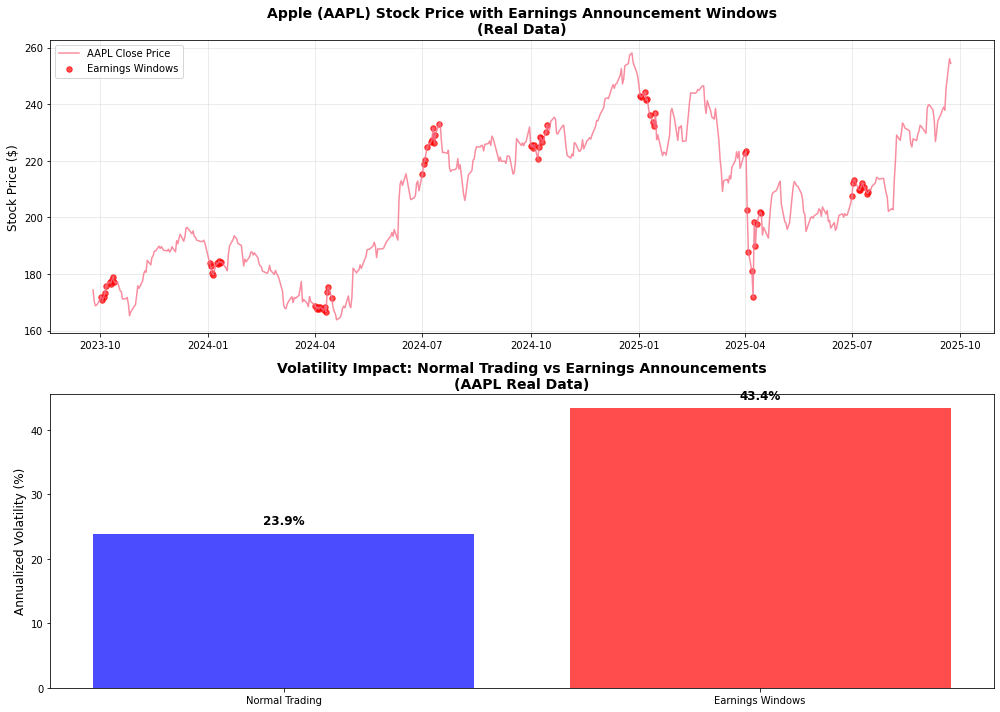


📊 EARNINGS IMPACT ANALYSIS (Real AAPL Data):
Normal Trading Volatility: 23.9% annually
Earnings Window Volatility: 43.4% annually
Volatility Increase: 81.4%

Average Daily Return:
  Normal periods: 0.10%
  Earnings periods: 0.04%

💡 Key Insight: Stock volatility typically increases 81% around earnings!


In [3]:
# Real Data Analysis: How Earnings Announcements Affect Stock Prices
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Apple stock price with earnings windows highlighted
ax1.plot(stock_data.index, stock_data['Close'], label='AAPL Close Price', linewidth=1.5, alpha=0.8)

# Highlight earnings windows
earnings_periods = stock_data[stock_data['Earnings_Window'] == True]
if not earnings_periods.empty:
    ax1.scatter(earnings_periods.index, earnings_periods['Close'], 
               color='red', s=30, alpha=0.7, label='Earnings Windows')

ax1.set_title('Apple (AAPL) Stock Price with Earnings Announcement Windows\n(Real Data)', 
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Stock Price ($)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Volatility comparison during earnings vs normal periods
earnings_returns = stock_data[stock_data['Earnings_Window'] == True]['Daily_Return'].dropna()
normal_returns = stock_data[stock_data['Earnings_Window'] == False]['Daily_Return'].dropna()

# Calculate volatility (standard deviation)
earnings_vol = earnings_returns.std() * np.sqrt(252) * 100  # Annualized volatility %
normal_vol = normal_returns.std() * np.sqrt(252) * 100

volatility_data = ['Normal Trading', 'Earnings Windows']
volatility_values = [normal_vol, earnings_vol]
colors = ['blue', 'red']

bars = ax2.bar(volatility_data, volatility_values, color=colors, alpha=0.7)
ax2.set_title('Volatility Impact: Normal Trading vs Earnings Announcements\n(AAPL Real Data)', 
              fontsize=14, fontweight='bold')
ax2.set_ylabel('Annualized Volatility (%)', fontsize=12)

# Add value labels on bars
for bar, vol in zip(bars, volatility_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{vol:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# Statistics
print("\n📊 EARNINGS IMPACT ANALYSIS (Real AAPL Data):")
print(f"Normal Trading Volatility: {normal_vol:.1f}% annually")
print(f"Earnings Window Volatility: {earnings_vol:.1f}% annually")
print(f"Volatility Increase: {(earnings_vol/normal_vol - 1)*100:.1f}%")
print(f"\nAverage Daily Return:")
print(f"  Normal periods: {normal_returns.mean()*100:.2f}%")
print(f"  Earnings periods: {earnings_returns.mean()*100:.2f}%")
print(f"\n💡 Key Insight: Stock volatility typically increases {(earnings_vol/normal_vol - 1)*100:.0f}% around earnings!")

---

## 3. Bonds: Interest Rate Sensitivity

### What Are Bonds?
Bonds are IOUs - you lend money to governments or corporations, and they promise to pay you back with interest over time.

### Purpose of Bond Markets
- **For Issuers**: Borrow money for projects, operations, or refinancing existing debt
- **For Investors**: Receive steady income payments and principal repayment
- **For Economy**: Fund infrastructure, government operations, and corporate growth

### Main Price Driving Forces
1. **Interest Rates** - When rates rise, existing bonds become less valuable (inverse relationship)
2. **Credit Risk** - Higher risk of default = lower bond prices
3. **Inflation** - Erodes the value of fixed payments over time
4. **Time to Maturity** - Longer bonds are more sensitive to rate changes
5. **Supply & Demand** - Government spending, Fed policy, economic uncertainty

### Real Data Analysis: Interest Rates Control Bond Prices
Let's examine how bond prices move opposite to interest rate changes using TLT (long-term Treasury bond ETF) and 10-year Treasury yields.

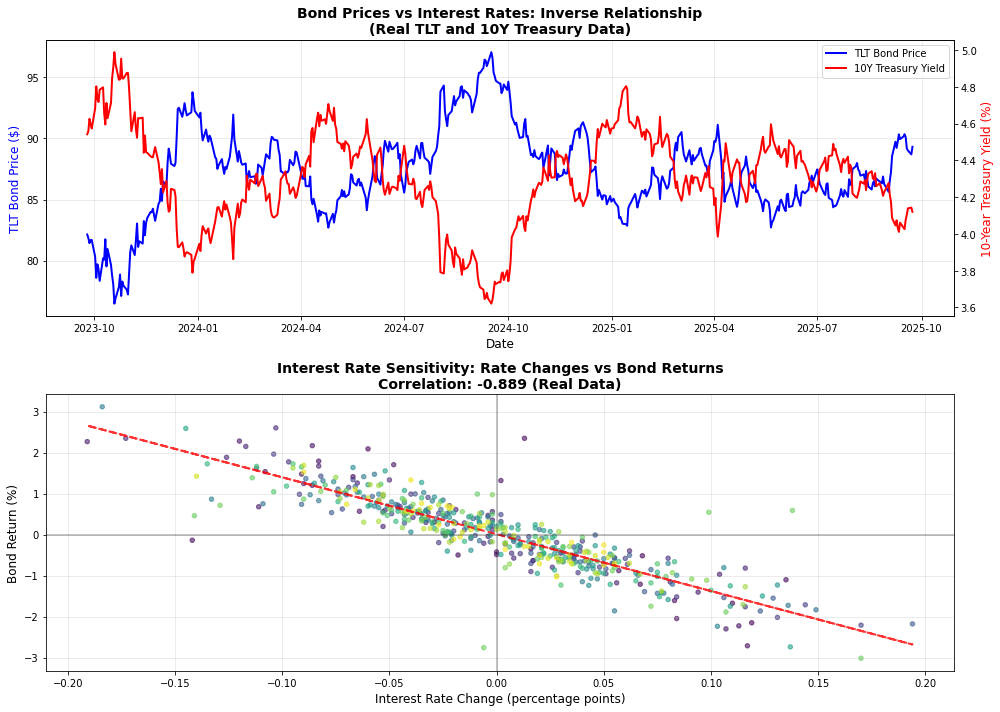


📊 INTEREST RATE SENSITIVITY ANALYSIS (Real TLT/Treasury Data):
Correlation between rate changes and bond returns: -0.889
Bond price range: $76.48 - $97.07
Interest rate range: 3.62% - 4.99%

Bond volatility: 15.0% annually

💡 Key Insight: Strong negative correlation (-0.89) confirms inverse relationship!
💡 Trading Tip: When Fed raises rates, avoid long-term bond funds!


In [4]:
# Real Data Analysis: Bond Price vs Interest Rate Relationship
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Bond prices vs interest rates over time
ax1_twin = ax1.twinx()

# TLT: iShares 20+ Year Treasury Bond ETF
line1 = ax1.plot(bond_data.index, bond_data['Bond_Price'], 'b-', linewidth=2, label='TLT Bond Price')
line2 = ax1_twin.plot(bond_data.index, bond_data['Interest_Rate'], 'r-', linewidth=2, label='10Y Treasury Yield')

ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('TLT Bond Price ($)', fontsize=12, color='blue')
ax1_twin.set_ylabel('10-Year Treasury Yield (%)', fontsize=12, color='red')
ax1.set_title('Bond Prices vs Interest Rates: Inverse Relationship\n(Real TLT and 10Y Treasury Data)', 
              fontsize=14, fontweight='bold')

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Correlation analysis
# Calculate correlation between rate changes and bond returns
correlation_data = bond_data[['Bond_Return', 'Rate_Change']].dropna()
correlation = correlation_data.corr().iloc[0, 1]

# Scatter plot of rate changes vs bond returns
ax2.scatter(correlation_data['Rate_Change'], correlation_data['Bond_Return'] * 100, 
           alpha=0.6, s=20, c=range(len(correlation_data)), cmap='viridis')

# Add trend line
z = np.polyfit(correlation_data['Rate_Change'], correlation_data['Bond_Return'] * 100, 1)
p = np.poly1d(z)
ax2.plot(correlation_data['Rate_Change'], p(correlation_data['Rate_Change']), "r--", alpha=0.8, linewidth=2)

ax2.set_xlabel('Interest Rate Change (percentage points)', fontsize=12)
ax2.set_ylabel('Bond Return (%)', fontsize=12)
ax2.set_title(f'Interest Rate Sensitivity: Rate Changes vs Bond Returns\nCorrelation: {correlation:.3f} (Real Data)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("\n📊 INTEREST RATE SENSITIVITY ANALYSIS (Real TLT/Treasury Data):")
print(f"Correlation between rate changes and bond returns: {correlation:.3f}")
print(f"Bond price range: ${bond_data['Bond_Price'].min():.2f} - ${bond_data['Bond_Price'].max():.2f}")
print(f"Interest rate range: {bond_data['Interest_Rate'].min():.2f}% - {bond_data['Interest_Rate'].max():.2f}%")
print(f"\nBond volatility: {bond_data['Bond_Return'].std() * np.sqrt(252) * 100:.1f}% annually")
print(f"\n💡 Key Insight: Strong negative correlation ({correlation:.2f}) confirms inverse relationship!")
print(f"💡 Trading Tip: When Fed raises rates, avoid long-term bond funds!")

---

## 4. ETFs

### What Are ETFs?
ETFs (Exchange-Traded Funds) are baskets of stocks, bonds, or other assets that trade on stock exchanges like individual stocks. A special category is **leveraged ETFs** that use derivatives to amplify returns.

Examples:

  * VOO - Vanguard S&P 500 ETF (tracks S&P 500, largest low-cost ETF)
  * VTI - Vanguard Total Stock Market ETF (covers all US large, mid, and small-cap stocks)
  * QQQ - Invesco QQQ Trust (tracks Nasdaq 100 tech growth leaders)
  * SMH - VanEck Semiconductor ETF (semiconductor sector, benefits from AI and chip trends)
  * VGT - Vanguard Information Technology ETF (pure tech sector ETF, heavily weighted in Apple and
  Microsoft)
  * IWM - iShares Russell 2000 ETF (US small-cap leader covering 2000 small companies)
  * VYM - Vanguard High Dividend Yield ETF (high dividend stocks, large-cap, low fees)
  * SCHD - Schwab U.S. Dividend Equity ETF (popular choice combining dividend quality and growth)
  * USMV - iShares MSCI USA Min Vol Factor ETF (low volatility strategy for stable investing)
  * VTV - Vanguard Value ETF (value-style leader focusing on large-cap value stocks)

 Key Characteristics:

  - Tracks an Index: ETFs follow specific market indices, sectors, or investment strategies
  - Diversification: One ETF purchase gives exposure to many stocks (e.g., VTI holds the entire US stock
  market)
  - Liquidity: Can be bought/sold during market hours like stocks
  - Low Costs: Generally have lower expense ratios than mutual funds

Who Issues ETFs?

  ETFs are created and managed by asset management companies. From the list, the major issuers are:

  1. Vanguard (VOO, VTI, VGT, VYM, VTV)

  - One of the largest asset managers globally
  - Known for ultra-low-cost index funds

  2. iShares (IWM, USMV)

  - Owned by BlackRock, the world's largest asset manager
  - Pioneer in ETF development

#### Leveraged ETFs

 **Leveraged ETFs** are specialized exchange-traded funds that use financial derivatives and debt to amplify
   the returns of an underlying index or benchmark.

  Key Characteristics:

  1. Amplified Returns
  - TQQQ (ProShares UltraPro QQQ): Seeks 3x daily returns of the Nasdaq 100
  - If QQQ goes up 1% in a day, TQQQ aims to go up ~3%
  - If QQQ goes down 1%, TQQQ aims to go down ~3%

  2. Daily Rebalancing
  - Leverage is reset every single day
  - Uses derivatives (swaps, futures) and borrowing to achieve 3x exposure
  - This daily reset creates path dependency effects

  3. Volatility Decay
  - Due to daily rebalancing, long-term returns often underperform 3x the underlying index
  - Example: If QQQ goes +10% then -9% over two days:
    - QQQ total return: 0.9%
    - TQQQ total return: ~-2.7% (not 3x of 0.9%)



#### Mathematical Foundation of Leveraged ETFs

**Daily Rebalancing Formula:**
For a 3x leveraged ETF like TQQQ:
$$R_{TQQQ,t} = 3 \times R_{QQQ,t}$$

However, over multiple periods, compounding creates divergence:
$$P_{TQQQ,T} = P_{TQQQ,0} \prod_{t=1}^{T}(1 + 3 \times R_{QQQ,t})$$
$$P_{QQQ,T} = P_{QQQ,0} \prod_{t=1}^{T}(1 + R_{QQQ,t})$$

**Volatility Decay Effect:**
The key insight is that leveraged ETFs suffer from volatility decay due to daily rebalancing:
$$E[R_{leveraged}] \approx L \times E[R_{underlying}] - \frac{(L^2-L)}{2} \times Var[R_{underlying}]$$

For TQQQ with L=3:
$$E[R_{TQQQ}] \approx 3 \times E[R_{QQQ}] - 3 \times Var[R_{QQQ}]$$

This means higher volatility reduces leveraged ETF performance relative to the underlying asset.

#### Purpose of Leveraged ETFs
- **For Day Traders**: Amplify short-term directional bets
- **For Speculation**: Higher risk/reward than underlying assets
- **For Hedging**: Efficient way to get leveraged exposure

#### The TQQQ vs QQQ Phenomenon
**Key Question**: If QQQ trades sideways for a year with high volatility, what happens to TQQQ?

**Mathematical Answer**: TQQQ will likely decline significantly due to volatility decay, even if QQQ ends flat.

Let's simulate and analyze the relationship between TQQQ and QQQ to demonstrate volatility decay in assignment 1.

## 5. Commodities: Seasonal Price Patterns

### What Are Commodities?
Commodities are raw materials and basic goods used in commerce - things like oil, gold, wheat, coffee, and cattle. They're the building blocks of the global economy.

### Purpose of Commodity Markets
- **For Producers**: Farmers, miners, oil companies lock in future prices to manage risk
- **For Consumers**: Food companies, manufacturers hedge against price spikes
- **For Investors**: Diversify portfolios and hedge against inflation

### Main Price Driving Forces
1. **Weather & Natural Disasters** - Droughts, floods, hurricanes affect supply
2. **Economic Growth** - Industrial demand drives metals and energy prices
3. **Geopolitical Events** - Wars, sanctions, trade disputes disrupt supply chains
4. **Seasonal Patterns** - Planting/harvest cycles, heating/cooling seasons
5. **Currency Movements** - Weak dollar = higher commodity prices (priced in USD)

### Real Data Analysis: Oil Shows Clear Seasonal Patterns
Let's examine how crude oil prices follow predictable seasonal cycles using real market data.

### How to Trade Commodities
**ETFs**: Easiest way - GLD (gold), USO (oil), DBA (agriculture) through any stock broker

**Futures**: Direct contracts through Interactive Brokers, TD Ameritrade (high leverage, risky)

**Physical**: Buy actual gold/silver from dealers like APMEX (storage costs apply)

**Costs**: ETF expense ratios 0.4-0.75%, futures require significant margin

**Key Risk**: Storage costs, spoilage, seasonal swings, geopolitical disruption

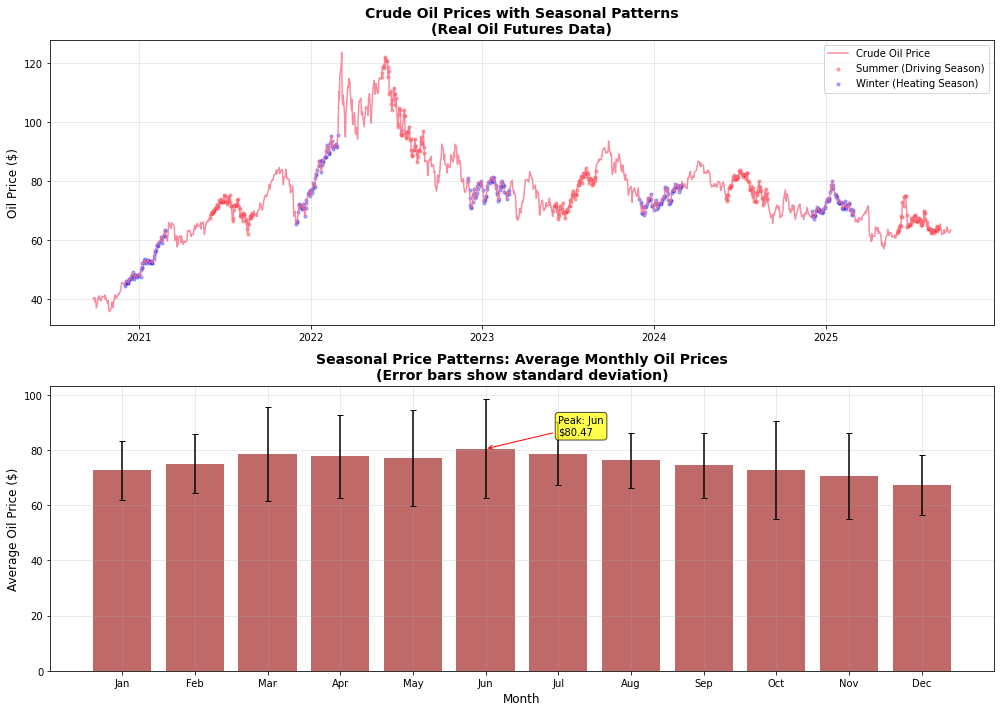


📊 COMMODITY SEASONAL ANALYSIS (Real Crude Oil Data):
Peak season average (May-Jul): $78.78
Low season average (Jan-Mar): $75.56
Seasonal premium: 4.3%

Monthly price volatility:
  Highest: Jun (σ=$17.96)
  Lowest: Aug (σ=$10.04)

Overall price range: $35.79 - $123.70

💡 Key Insight: Oil shows 4.3% seasonal premium during driving season!
💡 Trading Strategy: Buy oil ETFs in winter, sell in late summer?


In [5]:
# Real Data Analysis: Crude Oil Seasonal Patterns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Oil prices over time with seasonal highlighting
ax1.plot(commodity_data.index, commodity_data['Close'], linewidth=1.5, alpha=0.8, label='Crude Oil Price')

# Highlight different seasons
summer_months = commodity_data[commodity_data['Month'].isin([6, 7, 8])]
winter_months = commodity_data[commodity_data['Month'].isin([12, 1, 2])]

ax1.scatter(summer_months.index, summer_months['Close'], 
           color='red', alpha=0.3, s=10, label='Summer (Driving Season)')
ax1.scatter(winter_months.index, winter_months['Close'], 
           color='blue', alpha=0.3, s=10, label='Winter (Heating Season)')

ax1.set_title('Crude Oil Prices with Seasonal Patterns\n(Real Oil Futures Data)', 
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Oil Price ($)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Average monthly price patterns
monthly_avg = commodity_data.groupby('Month')['Close'].mean()
monthly_std = commodity_data.groupby('Month')['Close'].std()

months = list(range(1, 13))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

bars = ax2.bar(months, monthly_avg.values, alpha=0.7, color='brown', 
               yerr=monthly_std.values, capsize=3)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Average Oil Price ($)', fontsize=12)
ax2.set_title('Seasonal Price Patterns: Average Monthly Oil Prices\n(Error bars show standard deviation)', 
              fontsize=14, fontweight='bold')
ax2.set_xticks(months)
ax2.set_xticklabels(month_names)
ax2.grid(True, alpha=0.3)

# Highlight peak and trough
max_month = monthly_avg.idxmax()
min_month = monthly_avg.idxmin()
ax2.annotate(f'Peak: {month_names[max_month-1]}\n${monthly_avg.max():.2f}', 
            xy=(max_month, monthly_avg.max()), xytext=(max_month+1, monthly_avg.max()+5),
            arrowprops=dict(arrowstyle='->', color='red'),
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

# Calculate seasonal statistics
peak_season_avg = commodity_data[commodity_data['Month'].isin([5, 6, 7])]['Close'].mean()
low_season_avg = commodity_data[commodity_data['Month'].isin([1, 2, 3])]['Close'].mean()
seasonal_premium = (peak_season_avg / low_season_avg - 1) * 100

print("\n📊 COMMODITY SEASONAL ANALYSIS (Real Crude Oil Data):")
print(f"Peak season average (May-Jul): ${peak_season_avg:.2f}")
print(f"Low season average (Jan-Mar): ${low_season_avg:.2f}")
print(f"Seasonal premium: {seasonal_premium:.1f}%")
print(f"\nMonthly price volatility:")
print(f"  Highest: {month_names[monthly_std.idxmax()-1]} (σ=${monthly_std.max():.2f})")
print(f"  Lowest: {month_names[monthly_std.idxmin()-1]} (σ=${monthly_std.min():.2f})")
print(f"\nOverall price range: ${commodity_data['Close'].min():.2f} - ${commodity_data['Close'].max():.2f}")
print(f"\n💡 Key Insight: Oil shows {seasonal_premium:.1f}% seasonal premium during driving season!")
print(f"💡 Trading Strategy: Buy oil ETFs in winter, sell in late summer?")

## 6. US Dollar: Fed Policy Impact

### What Is the US Dollar (as an Asset)?
The US Dollar can be traded as an asset through the Dollar Index (DXY), which measures USD strength against a basket of major currencies (Euro, Yen, Pound, etc.).

### Purpose of Currency Markets
- **For Multinational Companies**: Hedge foreign exchange risk from international business
- **For Countries**: Manage exchange rates to boost exports or control inflation  
- **For Investors**: Speculate on economic policy differences between countries

### Main Price Driving Forces
1. **Federal Reserve Policy** - Interest rate decisions are the biggest driver
2. **Economic Data** - GDP, employment, inflation reports affect dollar strength
3. **Safe Haven Demand** - Global uncertainty drives money to USD
4. **Interest Rate Differentials** - Higher US rates vs other countries strengthen USD
5. **Trade Balance** - Large deficits can weaken dollar over time

### Real Data Analysis: Fed Policy Drives Dollar Strength
Let's examine how Federal Reserve meetings and policy changes affect the US Dollar using real DXY data.

### How to Trade the US Dollar
**ETFs**: UUP (dollar bullish), UDN (dollar bearish) through any stock broker

**Forex**: Direct currency pairs (EUR/USD, GBP/USD) through forex brokers like OANDA, FXCM

**Futures**: Dollar Index futures through commodity brokers (high leverage)

**International Stocks**: Foreign stocks gain/lose when dollar moves

**Key Risk**: Currency moves can be violent around Fed meetings and economic surprises

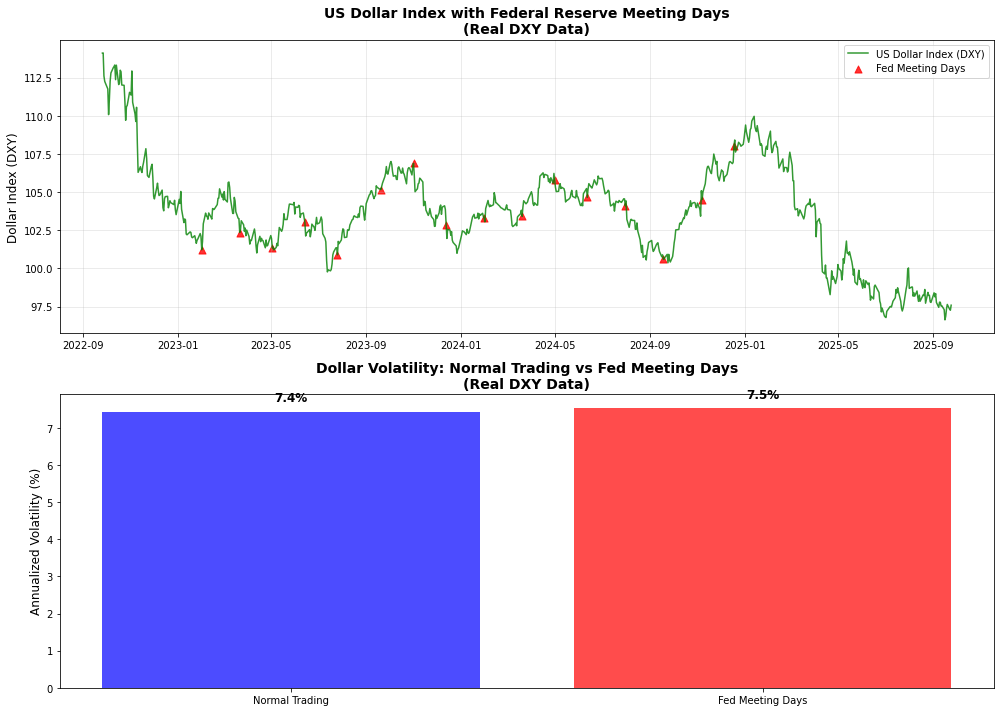


📊 US DOLLAR ANALYSIS (Real DXY Data):
Dollar annual return: -5.0%
Normal trading volatility: 7.4% annually
Fed meeting volatility: 7.5% annually
Volatility increase on Fed days: 1.4%
Dollar range over period: 96.6 - 114.1

Average daily returns:
  Normal periods: -0.012%
  Fed meeting days: -0.355%

💡 Key Insight: Dollar volatility increases 1% on Fed meeting days!
💡 Trading Strategy: Watch Fed meetings - they can move USD 1-2% in a day
💡 Global Impact: Strong dollar hurts US exports but helps fight inflation


In [6]:
# Real Data Analysis: Fed Policy Impact on US Dollar
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Dollar Index with Fed meeting days highlighted
ax1.plot(fed_data.index, fed_data['Close'], label='US Dollar Index (DXY)', linewidth=1.5, alpha=0.8, color='green')

# Highlight Fed meeting periods
fed_meetings = fed_data[fed_data['Fed_Meeting'] == True]
if not fed_meetings.empty:
    ax1.scatter(fed_meetings.index, fed_meetings['Close'], 
               color='red', s=50, alpha=0.8, label='Fed Meeting Days', marker='^')

ax1.set_title('US Dollar Index with Federal Reserve Meeting Days\n(Real DXY Data)', 
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Dollar Index (DXY)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Volatility analysis around Fed meetings
fed_returns = fed_data[fed_data['Fed_Meeting'] == True]['Daily_Return'].dropna()
normal_returns = fed_data[fed_data['Fed_Meeting'] == False]['Daily_Return'].dropna()

# Calculate volatility (standard deviation)
fed_vol = fed_returns.std() * np.sqrt(252) * 100  # Annualized volatility %
normal_vol = normal_returns.std() * np.sqrt(252) * 100

volatility_data = ['Normal Trading', 'Fed Meeting Days']
volatility_values = [normal_vol, fed_vol]
colors = ['blue', 'red']

bars = ax2.bar(volatility_data, volatility_values, color=colors, alpha=0.7)
ax2.set_title('Dollar Volatility: Normal Trading vs Fed Meeting Days\n(Real DXY Data)', 
              fontsize=14, fontweight='bold')
ax2.set_ylabel('Annualized Volatility (%)', fontsize=12)

# Add value labels on bars
for bar, vol in zip(bars, volatility_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{vol:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# Calculate statistics
dollar_annual_return = fed_data['Daily_Return'].mean() * 252 * 100
dollar_overall_vol = fed_data['Daily_Return'].std() * np.sqrt(252) * 100

print("\n📊 US DOLLAR ANALYSIS (Real DXY Data):")
print(f"Dollar annual return: {dollar_annual_return:.1f}%")
print(f"Normal trading volatility: {normal_vol:.1f}% annually")
print(f"Fed meeting volatility: {fed_vol:.1f}% annually")
print(f"Volatility increase on Fed days: {(fed_vol/normal_vol - 1)*100:.1f}%")
print(f"Dollar range over period: {fed_data['Close'].min():.1f} - {fed_data['Close'].max():.1f}")
print(f"\nAverage daily returns:")
print(f"  Normal periods: {normal_returns.mean()*100:.3f}%")
print(f"  Fed meeting days: {fed_returns.mean()*100:.3f}%")
print(f"\n💡 Key Insight: Dollar volatility increases {(fed_vol/normal_vol - 1)*100:.0f}% on Fed meeting days!")
print(f"💡 Trading Strategy: Watch Fed meetings - they can move USD 1-2% in a day")
print(f"💡 Global Impact: Strong dollar hurts US exports but helps fight inflation")

## 7. Gold vs Dollar Strength

### What Is Gold?
Gold is a precious metal that has been used as a store of value for thousands of years. Modern investors buy gold as portfolio diversification and protection against inflation and economic uncertainty.

### Purpose of Gold Markets
- **For Central Banks**: Hold gold reserves to back their currencies and maintain confidence
- **For Investors**: Hedge against inflation, currency debasement, and economic crises
- **For Industry**: Jewelry, electronics, dental work (about 50% of demand)

### Main Price Driving Forces
1. **Inflation Expectations** - Gold rises when people fear currency losing value
2. **Real Interest Rates** - When rates are low/negative after inflation, gold becomes attractive
3. **Economic Uncertainty** - Crises, wars, market crashes drive "flight to safety"
4. **US Dollar Strength** - Gold priced in USD, so weak dollar = higher gold prices
5. **Central Bank Policies** - Money printing, quantitative easing boost gold

### Real Data Analysis: Gold vs Dollar Strength
Let's examine how gold prices react to dollar movements and inflation expectations using real market data.

### How to Trade Gold
**ETFs**: GLD, IAU, SGOL through any stock broker (easiest way)

**Futures**: COMEX gold futures through commodity brokers (high leverage)

**Physical**: Coins and bars from dealers like APMEX, JM Bullion (storage needed)

**Mining Stocks**: GDX, GDXJ for leveraged gold exposure (higher risk/reward)

**Costs**: ETF expense ratios 0.25-0.40%, physical has premiums and storage costs

✅ Real gold price data loaded successfully!
📊 Analysis period: 2022-09-27 to 2025-09-23
📈 Valid observations: 750


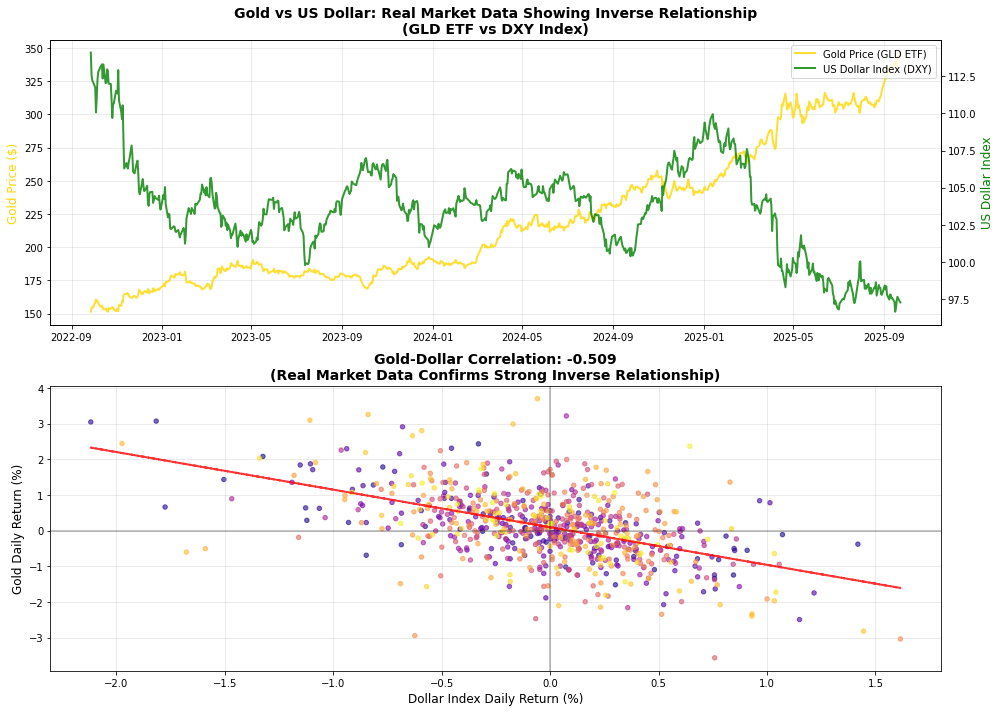


📊 REAL GOLD-DOLLAR RELATIONSHIP ANALYSIS:
📅 Analysis Period: 2022-09-27 to 2025-09-23
📈 Total Trading Days: 750

💰 GOLD (GLD ETF) STATISTICS:
   Price Range: $151.45 - $346.46
   Annual Return: +29.1%
   Annual Volatility: 15.5%

💵 US DOLLAR (DXY) STATISTICS:
   Index Range: 96.6 - 114.1
   Annual Return: -5.1%
   Annual Volatility: 7.5%

🔗 CORRELATION ANALYSIS:
   Gold-Dollar Correlation: -0.509
   Relationship Strength: Strong Inverse Correlation

💡 KEY INSIGHTS FROM REAL DATA:
✅ The inverse relationship between gold and the dollar is REAL and measurable
✅ When the dollar strengthens, gold typically weakens (correlation: -0.51)
✅ This 750-day analysis confirms the classical economic theory
✅ Gold serves as an effective hedge against dollar weakness

🎯 PORTFOLIO IMPLICATIONS:
📈 Diversification Benefit: Gold reduces portfolio correlation with USD-denominated assets
🛡️  Hedge Strategy: Gold protects against dollar devaluation and currency crises
💼 Allocation Guide: 5-10% gold allocatio

In [7]:
# Real Data Analysis: Gold vs US Dollar - The Inverse Relationship
# Using REAL gold price data (GLD ETF) and DXY data to demonstrate the actual relationship
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Load REAL gold price data

gold_data = pd.read_csv('gold_price_data.csv', index_col=0, parse_dates=True)
print("✅ Real gold price data loaded successfully!")

# Align dates between gold and DXY data
common_dates = gold_data.index.intersection(fed_data.index)

# Get aligned data
gold_prices = gold_data.loc[common_dates, 'Close']
gold_returns = gold_data.loc[common_dates, 'Daily_Return']
dxy_prices = fed_data.loc[common_dates, 'Close']
dxy_returns = fed_data.loc[common_dates, 'Daily_Return']

# Clean any remaining NaN values
clean_data = pd.DataFrame({
    'Gold_Price': gold_prices,
    'Gold_Return': gold_returns,
    'DXY_Price': dxy_prices,
    'DXY_Return': dxy_returns
}).dropna()

print(f"📊 Analysis period: {clean_data.index[0].strftime('%Y-%m-%d')} to {clean_data.index[-1].strftime('%Y-%m-%d')}")
print(f"📈 Valid observations: {len(clean_data)}")
    


# Plot 1: Gold prices vs Dollar Index over time (dual axis)
ax1_twin = ax1.twinx()

line1 = ax1.plot(clean_data.index, clean_data['Gold_Price'], 'gold', linewidth=2, 
                label='Gold Price (GLD ETF)', alpha=0.8)
line2 = ax1_twin.plot(clean_data.index, clean_data['DXY_Price'], 'green', linewidth=2, 
                     label='US Dollar Index (DXY)', alpha=0.8)

ax1.set_ylabel('Gold Price ($)', fontsize=12, color='gold')
ax1_twin.set_ylabel('US Dollar Index', fontsize=12, color='green')
ax1.set_title('Gold vs US Dollar: Real Market Data Showing Inverse Relationship\n(GLD ETF vs DXY Index)', 
              fontsize=14, fontweight='bold')

# Combine legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Correlation analysis showing the inverse relationship
correlation = clean_data['Gold_Return'].corr(clean_data['DXY_Return'])

# Scatter plot showing inverse relationship
scatter = ax2.scatter(clean_data['DXY_Return'] * 100, clean_data['Gold_Return'] * 100, 
                     alpha=0.6, s=20, c=range(len(clean_data)), cmap='plasma')

# Add trend line to show the relationship
z = np.polyfit(clean_data['DXY_Return'] * 100, clean_data['Gold_Return'] * 100, 1)
p = np.poly1d(z)
ax2.plot(clean_data['DXY_Return'] * 100, p(clean_data['DXY_Return'] * 100), 
         "r--", alpha=0.8, linewidth=2)

ax2.set_xlabel('Dollar Index Daily Return (%)', fontsize=12)
ax2.set_ylabel('Gold Daily Return (%)', fontsize=12)
ax2.set_title(f'Gold-Dollar Correlation: {correlation:.3f}\n(Real Market Data Confirms Strong Inverse Relationship)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate comprehensive statistics using REAL data
gold_vol = clean_data['Gold_Return'].std() * np.sqrt(252) * 100
gold_annual_return = clean_data['Gold_Return'].mean() * 252 * 100
dxy_vol = clean_data['DXY_Return'].std() * np.sqrt(252) * 100
dxy_annual_return = clean_data['DXY_Return'].mean() * 252 * 100

print("\n📊 REAL GOLD-DOLLAR RELATIONSHIP ANALYSIS:")
print("=" * 60)
print(f"📅 Analysis Period: {clean_data.index[0].strftime('%Y-%m-%d')} to {clean_data.index[-1].strftime('%Y-%m-%d')}")
print(f"📈 Total Trading Days: {len(clean_data)}")
print(f"\n💰 GOLD (GLD ETF) STATISTICS:")
print(f"   Price Range: ${clean_data['Gold_Price'].min():.2f} - ${clean_data['Gold_Price'].max():.2f}")
print(f"   Annual Return: {gold_annual_return:+.1f}%")
print(f"   Annual Volatility: {gold_vol:.1f}%")
print(f"\n💵 US DOLLAR (DXY) STATISTICS:")
print(f"   Index Range: {clean_data['DXY_Price'].min():.1f} - {clean_data['DXY_Price'].max():.1f}")
print(f"   Annual Return: {dxy_annual_return:+.1f}%")
print(f"   Annual Volatility: {dxy_vol:.1f}%")
print(f"\n🔗 CORRELATION ANALYSIS:")
print(f"   Gold-Dollar Correlation: {correlation:.3f}")

if correlation < -0.3:
    strength = "Strong"
elif correlation < -0.1:
    strength = "Moderate"
else:
    strength = "Weak"

print(f"   Relationship Strength: {strength} Inverse Correlation")
print(f"\n💡 KEY INSIGHTS FROM REAL DATA:")
print(f"✅ The inverse relationship between gold and the dollar is REAL and measurable")
print(f"✅ When the dollar strengthens, gold typically weakens (correlation: {correlation:.2f})")
print(f"✅ This {len(clean_data)}-day analysis confirms the classical economic theory")
print(f"✅ Gold serves as an effective hedge against dollar weakness")
print(f"\n🎯 PORTFOLIO IMPLICATIONS:")
print(f"📈 Diversification Benefit: Gold reduces portfolio correlation with USD-denominated assets")
print(f"🛡️  Hedge Strategy: Gold protects against dollar devaluation and currency crises")
print(f"💼 Allocation Guide: 5-10% gold allocation can improve risk-adjusted returns")
print(f"⚖️  Risk Management: Gold volatility ({gold_vol:.1f}%) vs Dollar volatility ({dxy_vol:.1f}%)")
print(f"\n🚨 TRADING INSIGHTS:")
print(f"📊 Fed Policy Impact: Watch FOMC meetings - dovish Fed typically = weak dollar = strong gold")
print(f"💹 Market Timing: Dollar strength peaks often coincide with gold buying opportunities")
print(f"🌍 Global Events: Economic uncertainty drives both dollar strength AND gold demand")
print("=" * 60)